<a href="https://colab.research.google.com/github/itsukishindo/IYS_AI_transport/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

text = df['Text'].values

# Delete the duplicate rows
df = df.drop_duplicates()
# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

{'C': 1}
The accuracy of the model is: 0.937799043062201


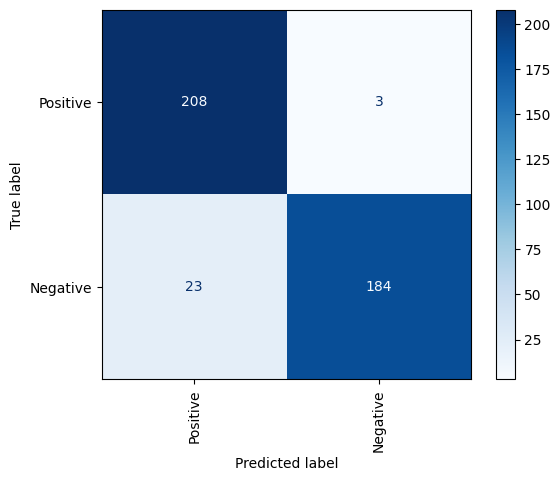

In [ ]:
#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'n_neighbors': 7, 'weights': 'distance'}
The accuracy of the model is: 0.9593301435406698


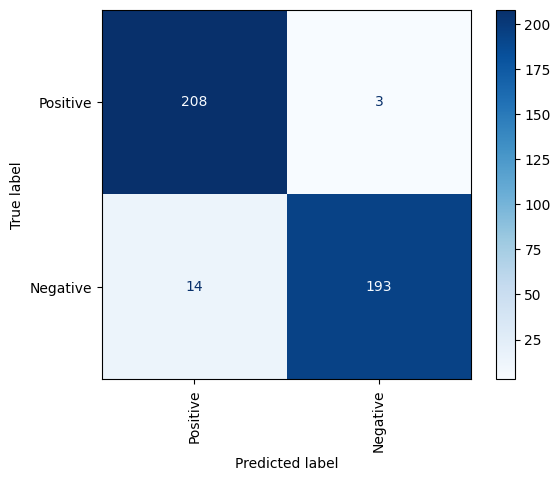

In [ ]:
#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(2)KNN
model=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
The accuracy of the model is: 0.9688995215311005


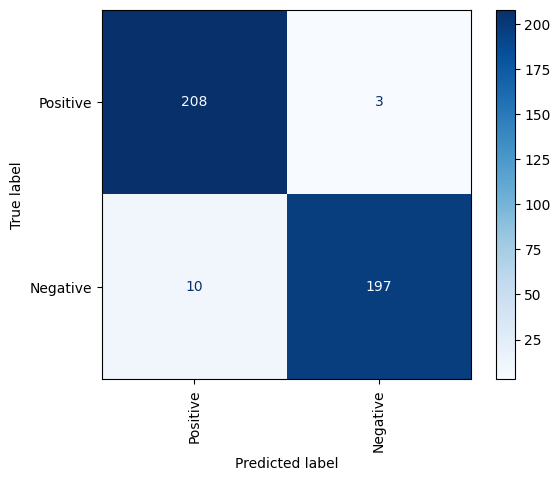

In [ ]:
#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(3)RF
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
The accuracy of the model is: 0.9593301435406698


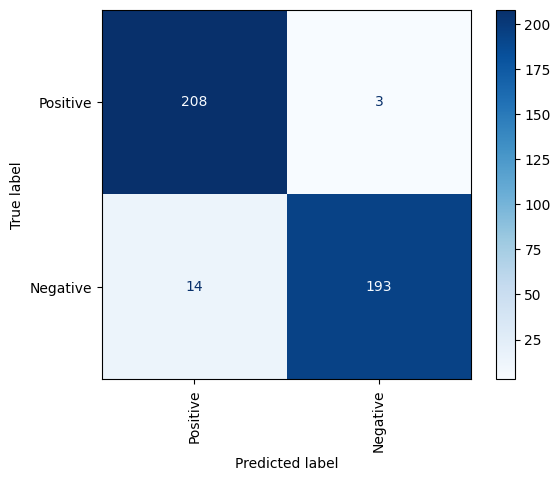

In [ ]:
#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(4)XGBoost
model =  XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'C': 10, 'kernel': 'rbf'}
The accuracy of the model is: 0.9593301435406698


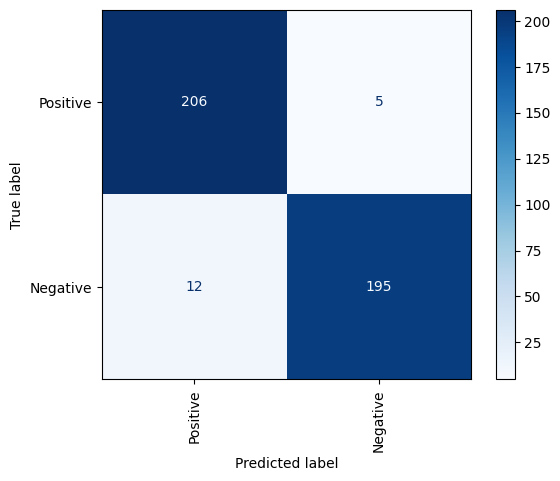

In [ ]:
#(1) CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(5)SVM
model= SVC(probability=True)
param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'C': 10}
The accuracy of the model is: 0.9521531100478469


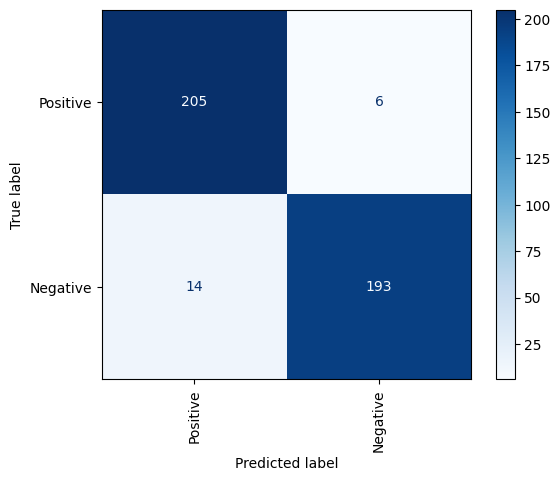

In [ ]:
#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'n_neighbors': 9, 'weights': 'uniform'}
The accuracy of the model is: 0.9545454545454546


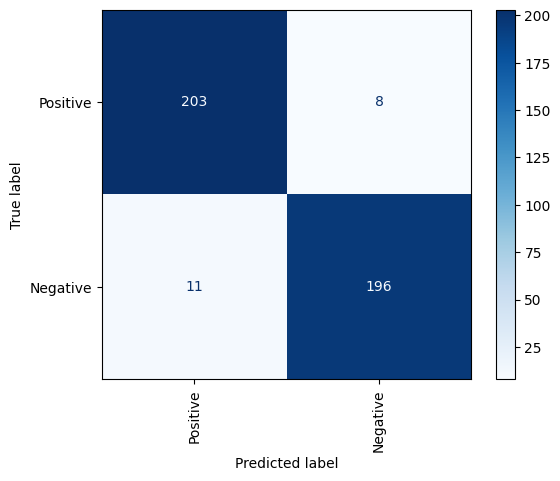

In [ ]:
#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(2)KNN
model=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
The accuracy of the model is: 0.9712918660287081


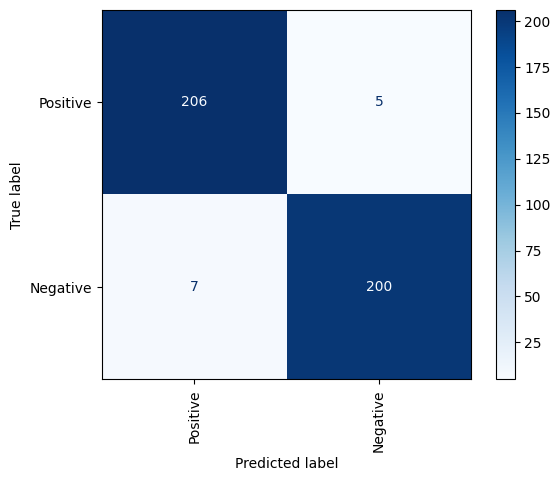

In [ ]:
#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(3)RF
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
The accuracy of the model is: 0.9736842105263158


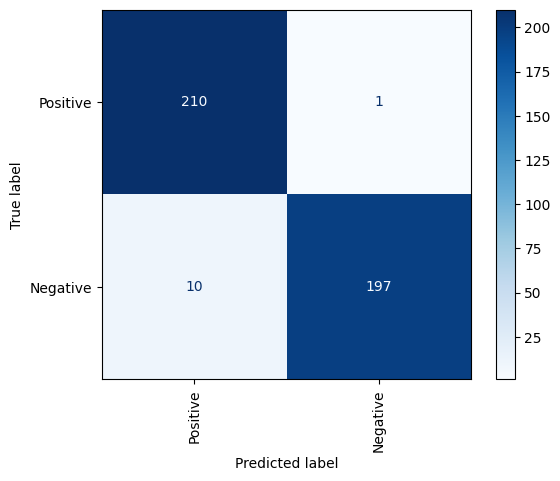

In [ ]:
#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(4)XGBoost
model =  XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'C': 10, 'kernel': 'rbf'}
The accuracy of the model is: 0.9712918660287081


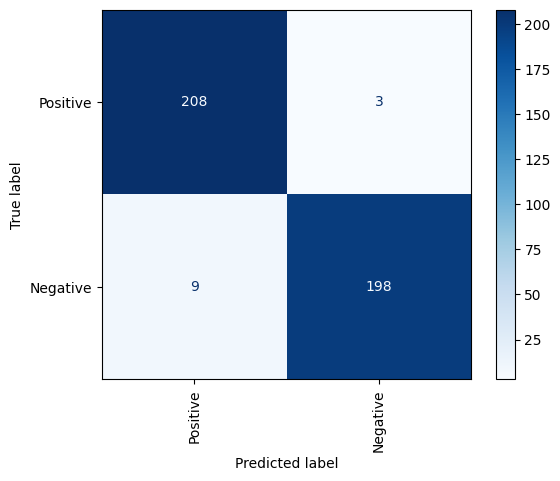

In [ ]:
#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(5)SVM
model= SVC(probability=True)
param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'C': 0.1}
The accuracy of the model is: 0.9569377990430622


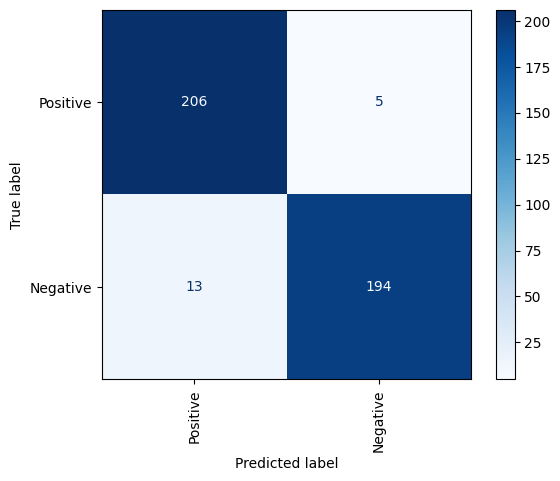

In [ ]:
#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(1)LR
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'n_neighbors': 5, 'weights': 'distance'}
The accuracy of the model is: 0.930622009569378


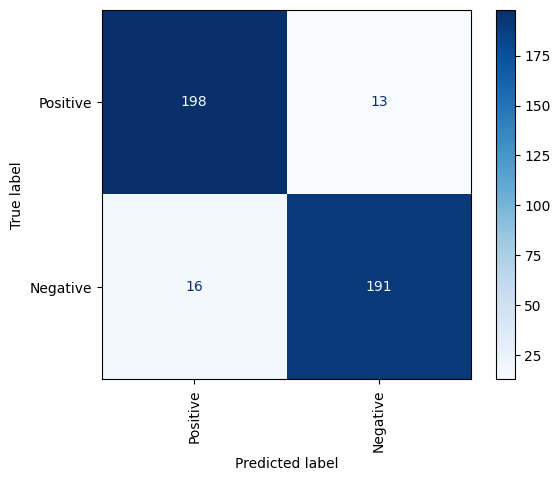

In [ ]:
#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(2)KNN
model=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
The accuracy of the model is: 0.9688995215311005


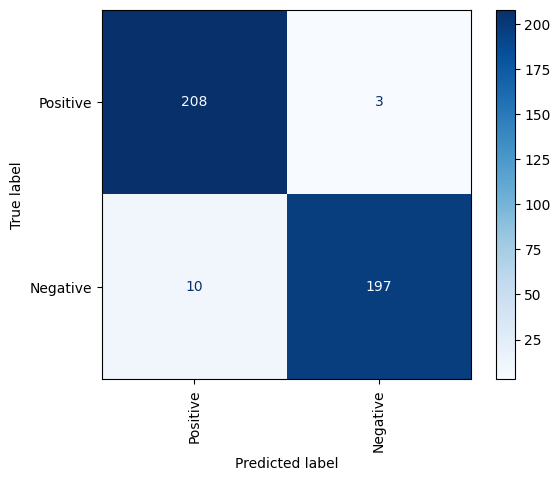

In [ ]:
#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(3)RF
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
The accuracy of the model is: 0.9641148325358851


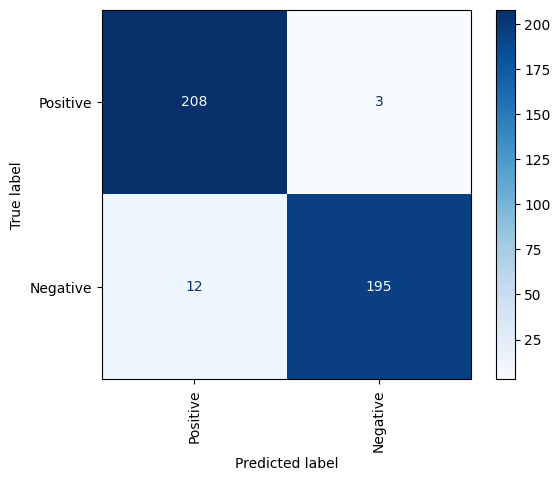

In [ ]:
#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(4)XGBoost
model =  XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))

{'C': 0.1, 'kernel': 'linear'}
The accuracy of the model is: 0.9545454545454546


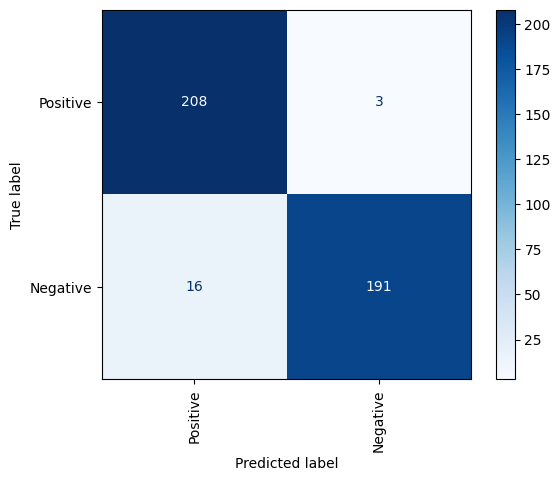

In [ ]:
#(3)TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=20,norm='l2',smooth_idf=True,use_idf=True,ngram_range=(1, 1),stop_words='english')

x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#(5)SVM
model= SVC(probability=True)
param_grid = {'kernel': ['linear', 'rbf', 'poly'],'C': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_
model = grid_search.best_estimator_
cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))